## SCM 3 coefficients

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
exp = 'SCM_3'
## Algorithms originally named as follows.
algs = ["Tar", "Src", "SrcPool", "DIP_mean", "DIP_MMD", 
        "CIP_LabelCorr_DIP_mean", "CIP_LabelCorr_DIP_MMD", 
        "DIP_Pool_mean", "DIP_Pool_MMD", 
        "CIP_mean", "CIP_MMD", 
        "CIP_LabelCorr_CIP_mean", "CIP_LabelCorr_CIP_MMD",
        "CIP_JointCIPDIP_MMD", "CIP_LabelCorr_JointCIPDIP_MMD",
        "IRM", "VREx", "groupDRO"]
seeds = range(1,11)

weights = np.zeros((len(algs),len(seeds), 18))
for i, algorithm in enumerate(algs):
    for j, seed in enumerate(seeds):
        d = torch.load(f'../results/{exp}_{algorithm}_model_seed{seed}.pt')
        try:
            w1 = d['lin1.weight'].detach().cpu().numpy()[0]
            w2 = d['lin1.weight'].detach().cpu().numpy()[1]
            weights[i, j, :] = w1-w2
        except:
            w1 = d['featurizer.weight'].detach().cpu().numpy()[0]
            w2 = d['featurizer.weight'].detach().cpu().numpy()[1]
            weights[i, j, :] = w1-w2
        

In [3]:
## Algorithms current names in the paper
alg_names = ["Tar", "ERM", "ERM-Pool", "DIP-mean", "DIP-MMD", 
             "IW-DIP-mean", "IW-DIP-MMD", 
        "DIP-Pool-mean", "DIP-Pool-MMD", "CIP-mean", "CIP-MMD", 
        "IW-CIP-mean", "IW-CIP-MMD",        
        "JointDIP", "IW-JointDIP",
        "IRM", "VREx", "groupDRO"]

In [4]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

for i, algorithm in enumerate(alg_names):
    if algorithm.endswith('-MMD'):
        continue
    elif algorithm.endswith('mean'):
        algorithm = algorithm[:-5]
    df1[algorithm] = np.abs(weights[i, :, :6]**2).sum(axis=1)
    df2[algorithm] = np.abs(weights[i, :, 6:12]**2).sum(axis=1)
    df3[algorithm] = np.abs(weights[i, :, 12:]**2).sum(axis=1)
df1 = pd.melt(df1, value_vars=df1.columns)
df2 = pd.melt(df2, value_vars=df2.columns)
df3 = pd.melt(df3, value_vars=df3.columns)

In [5]:
sns.set(rc={'figure.dpi':200})
sns.set(font_scale=1.6)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

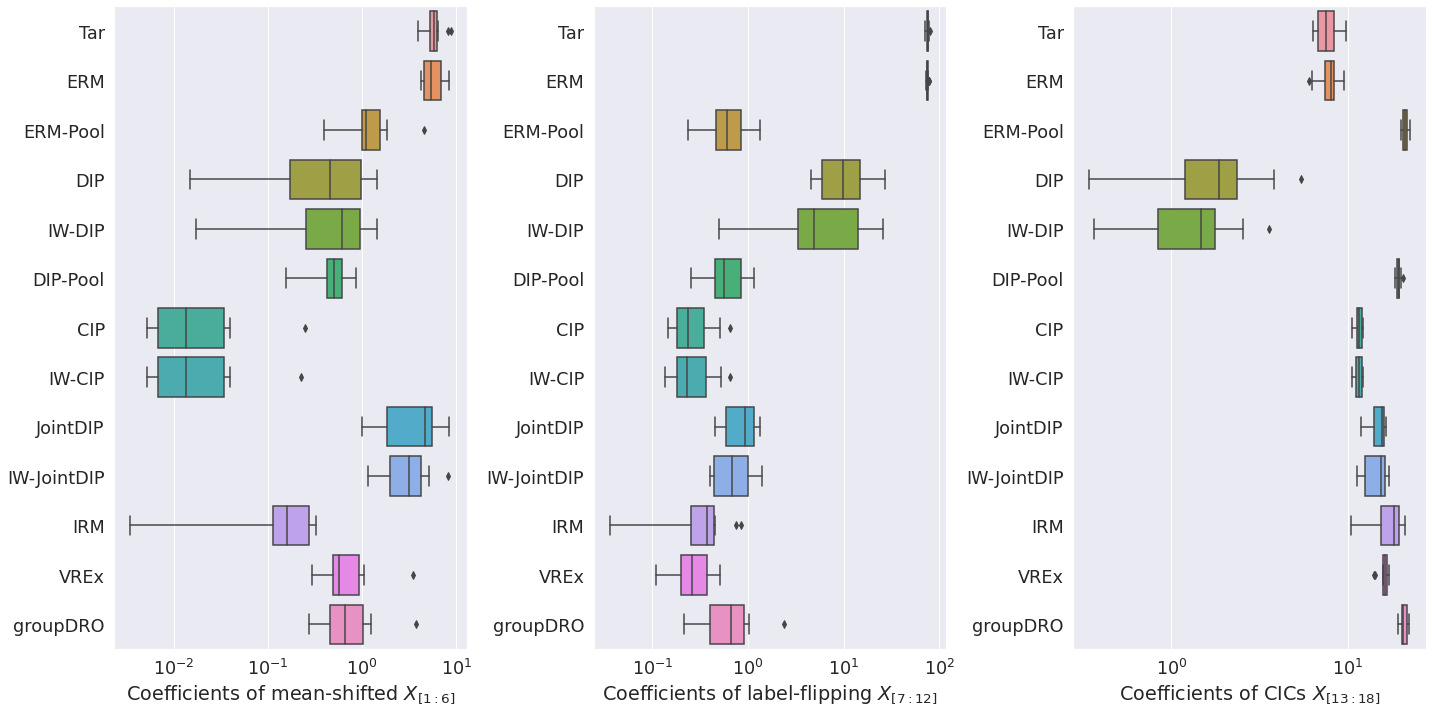

In [6]:
fig, axes = plt.subplots(ncols=3, figsize=(20,10))
sns.boxplot(data = df1, x = df1.value, y=df1.variable, ax = axes[0]).set(xlabel=r"Coefficients of mean-shifted $X_{[1:6]}$", ylabel='')
sns.boxplot(data = df2, x = df2.value, y=df2.variable, ax = axes[1]).set(xlabel=r"Coefficients of label-flipping $X_{[7:12]}$", ylabel='')
sns.boxplot(data = df3, x = df3.value, y=df3.variable, ax = axes[2]).set(xlabel=r"Coefficients of CICs $X_{[13:18]}$", ylabel='')
for i in range(3):
    axes[i].set(xscale="log")
plt.tight_layout()
plt.savefig('../SCM_coef_box.jpeg', dpi=300)
plt.show()